# Movie Recommender System 
###### Sathwik Kesappragada

Does the recommended section provide satisfaction? Are the movie suggestions popping up elevate anyone’s mood? Do the advertisements appearing in between Instagram posts catch anybody’s attention? Is there a system that gives better movie suggestions? 

From the moment an individual unlocks his/her phone till the moment he/she puts it away, every action being committed is tracked and monitored, stored into data, that is confidential information sold to big corporations. Pew Research states that 81% of Americans own smartphones creating a push for relevant and accurate promotions that will influence a user’s decision-making process and attract customers. With complex supervision, people with smartphones are being schemed to stay on their cellular devices for long periods of time to generate more revenue. Why? Companies with money can afford exceptional marketing. According to Business Wire, 60% of consumers click on cellphone ads every week suggesting how prevalent mobile advertising has become. Given these points, everyone is simply surrounded by recommender systems; people are constantly getting pitched ideas. From a simple Google search to a YouTube video to a Netflix original and to a song on Spotify, there exists a machine that advises its user based off abundant data. 

## Part I.) Data Wrangling

#### Imports

In [117]:
#call all import statements and their necessary pacakges
import sys
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
from ast import literal_eval
import seaborn as sns
import os
import missingno as msno 

In [2]:
#load data into variable
movies = pd.read_csv('C:/Users/sathw/Desktop/Springboard_work/IMDB-Movie-Ratings/rawdata/movies_metadata.csv', index_col = 'title', low_memory = False, nrows = 46000)
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Toy Story,FALSE,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/30/1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,7.7,5415.0
Jumanji,FALSE,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/15/1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,False,6.9,2413.0
Grumpier Old Men,FALSE,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,False,6.5,92.0
Waiting to Exhale,FALSE,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",12/22/1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,False,6.1,34.0
Father of the Bride Part II,FALSE,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/10/1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,False,5.7,173.0


In [3]:
#45466 movies 
movies.shape

(45466, 23)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45466 entries, Toy Story to Queerama
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 

In [5]:
type(movies['budget'].iloc[0])
type(movies['popularity'].iloc[0])
#type(movies['genres'].iloc[0])

str

In [6]:
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['popularity'] = pd.to_numeric(movies['popularity'], errors = 'coerce')

In [7]:
#returns all movie titles
movies.index

Index([                  'Toy Story',                     'Jumanji',
                  'Grumpier Old Men',           'Waiting to Exhale',
       'Father of the Bride Part II',                        'Heat',
                           'Sabrina',                'Tom and Huck',
                      'Sudden Death',                   'GoldenEye',
       ...
                  'House of Horrors',   'Shadow of the Blair Witch',
               'The Burkittsville 7',             'Caged Heat 3000',
                        'Robin Hood',                      'Subdue',
               'Century of Birthing',                    'Betrayal',
                  'Satan Triumphant',                    'Queerama'],
      dtype='object', name='title', length=45466)

In [8]:
#looking at one element
movies[movies.original_title == 'Toy Story'].transpose()

title,Toy Story
adult,FALSE
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,3e+07
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."


In [9]:
#want to redo, with function
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [10]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [11]:
#checking how many null values there are for each column/feature
missing = pd.concat([movies.isnull().sum(), 100 * movies.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending = False)

,count,%
belongs_to_collection,40972,90.115691
homepage,37684,82.883913
tagline,25054,55.104914
overview,954,2.098271
poster_path,386,0.848986
runtime,263,0.578454
release_date,87,0.191352
status,87,0.191352
imdb_id,17,0.037391
original_language,11,0.024194


<function matplotlib.pyplot.show(*args, **kw)>

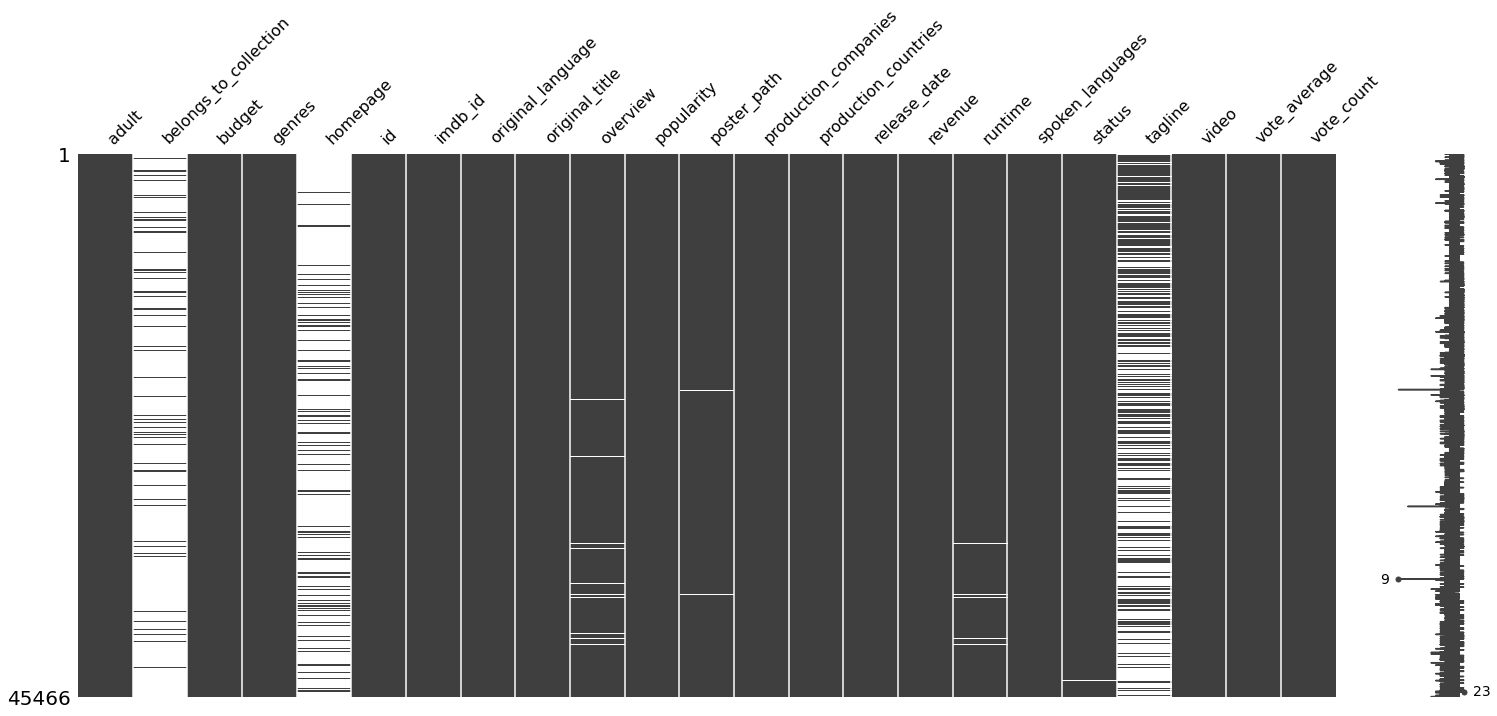

In [12]:
msno.matrix(movies)
plt.show

In [13]:
movies[movies['vote_average'].isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
NaN,FALSE,NaN,0.0,"[Action, Thriller, Drama]",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,- Written by Ørnås,0.065736,NaN,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",8/20/1997,0,104,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,[],1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,FALSE,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0.0,"[Animation, Science Fiction]",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Rune Balot goes to a casino connected to the ...,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/29/2012,0,68,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,[],12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,FALSE,NaN,0.0,"[TV Movie, Action, Horror, Science Fiction]",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalanche Sharks tells the story of a bikini ...,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1/1/2014,0,82,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,[],22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#looking for duplicates in movie title
movies['original_title'].value_counts().head(15)

Alice in Wonderland              8
Hamlet                           8
Macbeth                          7
Cinderella                       7
The Three Musketeers             7
A Christmas Carol                7
Les Misérables                   7
Frankenstein                     6
The Hound of the Baskervilles    6
Treasure Island                  6
Jane Eyre                        6
Blackout                         6
Heidi                            6
King Lear                        6
Wuthering Heights                6
Name: original_title, dtype: int64

In [15]:
#sometimes movies with the same title are released
#you can tell theyre different by looking at release dates
movies[movies['original_title'] == 'Macbeth'].transpose()

title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,A Performance of Macbeth,Macbeth
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,1.5e+07,0,0
genres,[Drama],[Drama],[Thriller],"[Thriller, Drama, Action]","[History, Drama, War]","[Drama, Foreign]",[Drama]
homepage,NaN,NaN,NaN,NaN,http://www.macbeth-movie.com/,NaN,NaN
id,27883,115427,119844,13775,225728,41149,133448
imdb_id,tt0040558,tt0292081,tt0084284,tt0434541,tt2884018,tt0079499,tt1570337
original_language,en,hu,en,en,en,en,en
original_title,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth,Macbeth
overview,Orson Welles' unique take on Shakespeare's cla...,A Hungarian TV version of the play shot in jus...,Macbeth and his wife murder Duncan in order to...,"Macbeth, loyal to his crime boss, Duncan, is t...",Feature film adaptation of Shakespeare's Scott...,"Shakespeare's classic tragedy of ambition, wit...",Part of the PBS Great Performance Series. Reno...


In [16]:
#another method to identify duplicates 
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

Blackout, 12/26/2008                                             3
Das Versprechen, 2/16/1995                                       2
Pokémon 3: The Movie, 7/8/2000                                   2
Broderskab, 10/21/2009                                           2
A Place at the Table, 3/22/2012                                  2
                                                                ..
Anders als die Andern, 5/28/1919                                 1
Sliding Doors, 4/23/1998                                         1
LEGO DC Comics Super Heroes: Batman: Be-Leaguered, 10/27/2014    1
House of Games, 10/11/1987                                       1
Like Crazy, 10/28/2011                                           1
Length: 45349, dtype: int64

In [17]:
#literally everything is same
movies[movies['original_title'] == 'Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,0,0
genres,"[Thriller, Mystery]","[Thriller, Mystery]","[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,141971,141971,100063,226630,416951
imdb_id,tt1180333,tt1180333,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,fi,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [18]:
movies[['original_title', 'release_date']].nunique()

original_title    43371
release_date      17336
dtype: int64

In [19]:
movies = movies.drop_duplicates(subset=['original_title', 'release_date'])

In [20]:
(movies['original_title'] + ', ' + movies['release_date']).value_counts()

Ataúd blanco: El juego diabólico, 7/21/2016                      1
A Nutcracker Christmas, 12/10/2016                               1
CBGB, 10/11/2013                                                 1
Il peggior Natale della mia vita, 12/22/2012                     1
Song One, 1/20/2014                                              1
                                                                ..
Anders als die Andern, 5/28/1919                                 1
Sliding Doors, 4/23/1998                                         1
LEGO DC Comics Super Heroes: Batman: Be-Leaguered, 10/27/2014    1
House of Games, 10/11/1987                                       1
Like Crazy, 10/28/2011                                           1
Length: 45349, dtype: int64

In [21]:
movies[movies['original_title']=='Blackout'].transpose()

title,Blackout,Blackout,Blackout,Blackout
adult,FALSE,FALSE,FALSE,FALSE
belongs_to_collection,NaN,NaN,NaN,NaN
budget,0,0,0,0
genres,"[Thriller, Mystery]","[Action, Thriller]","[Horror, Thriller]",[Documentary]
homepage,NaN,NaN,NaN,http://www.pbs.org/wgbh/americanexperience/fil...
id,141971,100063,226630,416951
imdb_id,tt1180333,tt0077241,tt0088816,tt4284046
original_language,fi,en,en,en
original_title,Blackout,Blackout,Blackout,Blackout
overview,Recovering from a nail gun shot to the head an...,A black comedy of violent criminals who terror...,A police officer suspects that a local husband...,"First responders, journalists, shop owners, th..."


In [22]:
#checking to see how many 0s there are in each column
count_revenue_zero = sum(map(lambda x : x == 0, movies['revenue']))
print(count_revenue_zero)

count_budget_zero = sum(map(lambda x : x == 0, movies['budget']))
print(count_budget_zero)

#print(type(movies['popularity'].iloc[0]))
count_pop_zero = sum(map(lambda x : x == 0, movies['popularity']))
print(count_pop_zero)

count_runtime_zero = sum(map(lambda x : x == 0, movies['runtime']))
print(count_runtime_zero)

count_voteavg_zero = sum(map(lambda x : x == 0, movies['vote_average']))
print(count_voteavg_zero)

count_votecnt_zero = sum(map(lambda x: x == 0, movies['vote_count']))
print(count_votecnt_zero)

38032
36553
66
1558
2995
2896


In [23]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors = 'coerce')
oldest_movie_bydate = movies.release_date.min()
most_recent_bydate = movies.release_date.max()

In [24]:
print(oldest_movie_bydate)
print(most_recent_bydate)

1874-12-09 00:00:00
2020-12-16 00:00:00


In [25]:
movies[movies['release_date'] == oldest_movie_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Passage of Venus,FALSE,NaN,0.0,[Documentary],NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,[France],1874-12-09,0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,False,6.0,19.0


In [26]:
movies[movies['release_date'] == most_recent_bydate]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,[United States of America],2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0


In [27]:
movies[movies['release_date'] > '2018-01-01 00:00:00']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Avatar 2,FALSE,"{'id': 87096, 'name': 'Avatar Collection', 'po...",0.0,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,76600,tt1630029,en,Avatar 2,A sequel to Avatar (2009).,...,[United States of America],2020-12-16,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",In Production,NaN,False,0.0,58.0
Bad Boys for Life,FALSE,"{'id': 14890, 'name': 'Bad Boys Collection', '...",0.0,"[Thriller, Action, Crime]",NaN,38700,tt1502397,en,Bad Boys for Life,The continuing adventures of Miami detectives ...,...,[United States of America],2018-11-07,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Planned,NaN,False,0.0,12.0
Iron Sky: The Coming Race,FALSE,"{'id': 312977, 'name': 'Iron Sky Collection', ...",18000000.0,"[Action, Comedy, Fantasy, Science Fiction]",http://www.ironsky.net/,302349,tt3038708,en,Iron Sky: The Coming Race,"Twenty years after the events of Iron Sky, the...",...,"[Belgium, Finland, Germany]",2018-03-01,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Post Production,NaN,False,0.0,0.0
Mary Shelley,FALSE,NaN,0.0,"[Drama, Romance]",NaN,332283,tt3906082,en,Mary Shelley,The love affair between poet Percy Shelley and...,...,"[Ireland, Luxembourg, United Kingdom]",2018-04-25,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
The Other Side of the Wind,FALSE,NaN,12000000.0,"[Comedy, Drama]",NaN,299782,tt0069049,en,The Other Side of the Wind,"Orson Welles' unfinished masterpiece, restored...",...,"[Iran, United States of America]",2018-12-31,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0
Mobile Homes,FALSE,NaN,0.0,[Drama],NaN,412059,tt5613402,en,Mobile Homes,"In forgotten towns along the American border, ...",...,"[France, Canada]",2018-04-04,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,False,0.0,1.0


In [28]:
movies['genres'].value_counts()

[Drama]                                                                           4996
[Comedy]                                                                          3620
[Documentary]                                                                     2721
[]                                                                                2442
[Drama, Romance]                                                                  1300
                                                                                  ... 
[Action, Adventure, Animation, Comedy, Family, Horror]                               1
[Drama, Thriller, Documentary]                                                       1
[Action, Animation, Comedy, Science Fiction]                                         1
[Drama, Horror, Family]                                                              1
[Fantasy, Animation, Drama, Science Fiction, Romance, Foreign, Family, Comedy]       1
Name: genres, Length: 4069, dtype: int64

In [29]:
movies['genres'].filter(regex= 'Drama|Comedy').count()

59

In [30]:
#print(movies.columns.isin(movies.genres).any())
movies['num_genres'] = movies['genres'].str.len()
movies['num_genres']    

title
Toy Story                      3
Jumanji                        3
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    1
                              ..
Subdue                         2
Century of Birthing            1
Betrayal                       3
Satan Triumphant               0
Queerama                       0
Name: num_genres, Length: 45436, dtype: int64

In [31]:
movies['num_genres'].value_counts() #2442 movies don't have any genre 

1    14552
2    14471
3     9579
4     3378
0     2442
5      830
6      157
7       24
8        3
Name: num_genres, dtype: int64

In [32]:
movies['num_genres']

title
Toy Story                      3
Jumanji                        3
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    1
                              ..
Subdue                         2
Century of Birthing            1
Betrayal                       3
Satan Triumphant               0
Queerama                       0
Name: num_genres, Length: 45436, dtype: int64

In [33]:
movie_with_one = movies[movies['num_genres'] == 1]

In [49]:
movie_with_one.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,14552.0,1.476017e+06,7.644903e+06,0.0,0.000000,0.000000,0.000000,1.900000e+08
popularity,14552.0,1.929592e+00,3.115950e+00,0.0,0.247577,0.766259,2.017234,6.429999e+01
revenue,14552.0,3.710493e+06,2.600311e+07,0.0,0.000000,0.000000,0.000000,1.506249e+09
runtime,14430.0,9.020312e+01,4.027209e+01,0.0,82.000000,92.000000,104.000000,1.140000e+03
vote_average,14552.0,5.582992e+00,2.117373e+00,0.0,5.000000,6.000000,6.900000,1.000000e+01
vote_count,14552.0,4.617159e+01,2.135003e+02,0.0,2.000000,7.000000,20.000000,9.678000e+03
num_genres,14552.0,1.000000e+00,0.000000e+00,1.0,1.000000,1.000000,1.000000,1.000000e+00


In [34]:
movie_with_two = movies[movies['num_genres'] == 2]

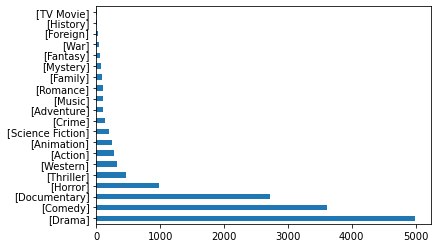

In [35]:
movie_with_one['genres'].value_counts().plot(kind='barh') # 20 unique single genres

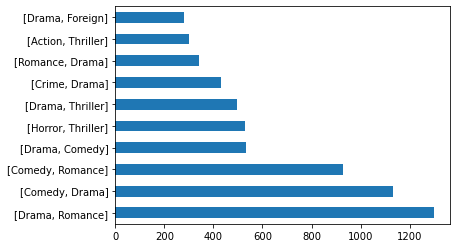

In [36]:
movie_with_two['genres'].value_counts().head(10).plot(kind ='barh') #303 unique pairs

In [37]:
movie_genres_key=movie_with_one['genres'].apply(lambda x: '_'.join((map(str,x))))

In [38]:
print(type(movie_genres_key))

<class 'pandas.core.series.Series'>


In [39]:
one_genre = movie_with_one.groupby(movie_genres_key).agg([np.mean, np.std]) 
one_genre

budget               popularity            \
                         mean           std       mean       std   
genres                                                             
Action           4.572418e+06  1.744645e+07   2.781620  4.904922   
Adventure        7.870664e+06  2.310080e+07   2.672130  3.420682   
Animation        1.273816e+06  8.001286e+06   1.470265  2.333301   
Comedy           2.308151e+06  9.138128e+06   2.319682  3.303201   
Crime            1.676642e+05  1.570883e+06   0.795429  1.397349   
Documentary      7.654178e+04  9.729245e+05   0.839767  1.499874   
Drama            1.444392e+06  6.795743e+06   2.076730  3.280684   
Family           5.397802e+04  3.222319e+05   1.196871  1.404601   
Fantasy          5.214668e+06  2.117119e+07   2.564205  4.484648   
Foreign          0.000000e+00  0.000000e+00   0.295500  0.272522   
History          1.666667e+06  4.864840e+06   1.104759  1.630631   
Horror           8.799475e+05  3.610643e+06   2.592284  3.496425   
Music            6.668442e+05  3.544548e+06   1.018582  1.879204   
Mystery          1.488571e+05  9.885233e+05   0.989052  1.889868   
Romance          7.926804e+05  3.619914e+06   1.250001  1.774090   
Science Fiction  3.833623e+06  1.769418e+07   2.268901  3.548074   
TV Movie         0.000000e+00  0.000000e+00   0.874082  0.449468   
Thriller         1.844343e+06  7.669162e+06   2.585835  3.475072   
War              2.644595e+06  1.154516e+07   2.006420  5.731933   
Western          6.413421e+05  4.571157e+06   2.112993  3.421862   

                      revenue                   runtime              \
                         mean           std        mean         std   
genres                                                                
Action           1.080632e+07  9.359374e+07   98.446043   34.475476   
Adventure        1.219243e+07  5.325056e+07  102.761468   39.675512   
Animation        2.602251e+06  2.062083e+07   32.137500   35.982008   
Comedy           6.463372e+06  2.908611e+07   83.313378   30.524418   
Crime            1.191045e+01  1.378734e+02   84.255814   26.784230   
Documentary      2.133014e+05  3.158019e+06   84.981919   57.298330   
Drama            3.550004e+06  2.373198e+07  100.902316   33.536063   
Family           1.318689e+05  1.257942e+06   81.065934   26.725270   
Fantasy          6.303966e+06  2.676225e+07   76.980000   50.932725   
Foreign          0.000000e+00  0.000000e+00   97.315789   53.249990   
History          1.768501e+06  6.849374e+06  121.133333  116.380452   
Horror           3.391715e+06  2.020216e+07   86.280576   19.786057   
Music            6.550308e+05  4.016325e+06   93.027523   41.476334   
Mystery          2.080012e+05  1.740263e+06   84.928571   27.451840   
Romance          4.932516e+06  2.321665e+07   87.147368   41.422054   
Science Fiction  6.042526e+06  4.304793e+07   88.377551   66.647718   
TV Movie         0.000000e+00  0.000000e+00  125.714286  191.417270   
Thriller         2.566891e+06  1.516109e+07   91.819957   28.687145   
War              4.047900e+06  1.665211e+07  101.162162   39.102084   
Western          1.693802e+06  1.091139e+07   92.103774   28.152781   

                vote_average           vote_count             num_genres       
                        mean       std       mean         std       mean  std  
genres                                                                         
Action              5.444964  1.700656  72.863309  348.051030          1  0.0  
Adventure           4.565455  2.350383  64.372727  188.093177          1  0.0  
Animation           6.118595  1.864348  26.909091   74.401289          1  0.0  
Comedy              5.532514  1.919190  66.720718  237.915406          1  0.0  
Crime               4.770149  2.528128   5.104478    6.355707          1  0.0  
Documentary         5.726204  2.643362  11.161338   29.354039          1  0.0  
Drama               5.846477  1.986093  49.471377  251.137035          1  0.0  
Family              4.95

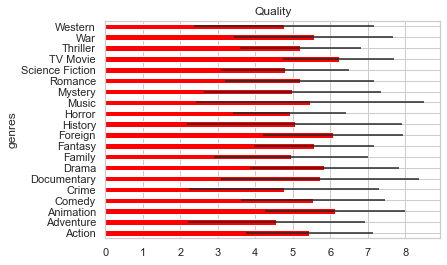

In [50]:
one_genre['vote_average'].plot(kind = "barh", y = "mean", legend = False,  
          xerr = "std", title = "Quality", color = "red")

In [133]:
one_genre_df = pd.DataFrame(one_genre)
x = one_genre[one_genre['vote_average', 'mean'] > 5.0]
x

budget               popularity                 revenue  \
                     mean           std       mean       std          mean   
genres                                                                       
Action       4.572418e+06  1.744645e+07   2.781620  4.904922  1.080632e+07   
Animation    1.273816e+06  8.001286e+06   1.470265  2.333301  2.602251e+06   
Comedy       2.308151e+06  9.138128e+06   2.319682  3.303201  6.463372e+06   
Documentary  7.654178e+04  9.729245e+05   0.839767  1.499874  2.133014e+05   
Drama        1.444392e+06  6.795743e+06   2.076730  3.280684  3.550004e+06   
Fantasy      5.214668e+06  2.117119e+07   2.564205  4.484648  6.303966e+06   
Foreign      0.000000e+00  0.000000e+00   0.295500  0.272522  0.000000e+00   
History      1.666667e+06  4.864840e+06   1.104759  1.630631  1.768501e+06   
Music        6.668442e+05  3.544548e+06   1.018582  1.879204  6.550308e+05   
Romance      7.926804e+05  3.619914e+06   1.250001  1.774090  4.932516e+06   
TV Movie     0.000000e+00  0.000000e+00   0.874082  0.449468  0.000000e+00   
Thriller     1.844343e+06  7.669162e+06   2.585835  3.475072  2.566891e+06   
War          2.644595e+06  1.154516e+07   2.006420  5.731933  4.047900e+06   

                              runtime             vote_average            \
                      std        mean         std         mean       std   
genres                                                                     
Action       9.359374e+07   98.446043   34.475476     5.444964  1.700656   
Animation    2.062083e+07   32.137500   35.982008     6.118595  1.864348   
Comedy       2.908611e+07   83.313378   30.524418     5.532514  1.919190   
Documentary  3.158019e+06   84.981919   57.298330     5.726204  2.643362   
Drama        2.373198e+07  100.902316   33.536063     5.846477  1.986093   
Fantasy      2.676225e+07   76.980000   50.932725     5.566667  1.606321   
Foreign      0.000000e+00   97.315789   53.249990     6.068421  1.874108   
History      6.849374e+06  121.133333  116.380452     5.046667  2.880691   
Music        4.016325e+06   93.027523   41.476334     5.462385  3.048430   
Romance      2.321665e+07   87.147368   41.422054     5.181443  1.995168   
TV Movie     0.000000e+00  125.714286  191.417270     6.228571  1.479543   
Thriller     1.516109e+07   91.819957   28.687145     5.196774  1.613337   
War          1.665211e+07  101.162162   39.102084     5.556757  2.120474   

            vote_count             num_genres       
                  mean         std       mean  std  
genres                                              
Action       72.863309  348.051030          1  0.0  
Animation    26.909091   74.401289          1  0.0  
Comedy       66.720718  237.915406          1  0.0  
Documentary  11.161338   29.354039          1  0.0  
Drama        49.471377  251.137035          1  0.0  
Fantasy      72.254902  209.798746          1  0.0  
Foreign       4.263158    4.688545          1  0.0  
History      15.333333   41.700748          1  0.0  
Music        15.440367   54.415315          1  0.0  
Romance      37.865979  185.584023          1  0.0  
TV Movie      7.000000    5.686241          1  0.0  
Thriller     45.182796  152.653833          1  0.0  
War          44.783784  177.184796          1  0.0

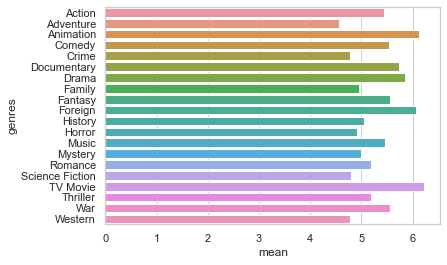

In [58]:
ax = sns.barplot(data=one_genre['vote_average'], y=one_genre.index, x= "mean", orient="h")

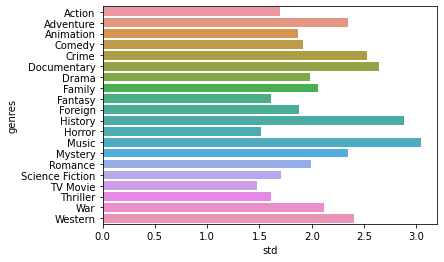

In [42]:
ax = sns.barplot(data = one_genre, y=one_genre.index, x= one_genre['vote_average']['std'], orient="h")

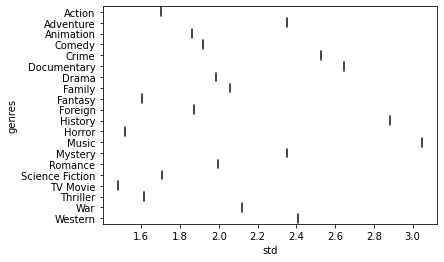

In [43]:
ax = sns.boxplot(data = one_genre, y=one_genre.index, x= one_genre['vote_average']['std'], orient="h" )

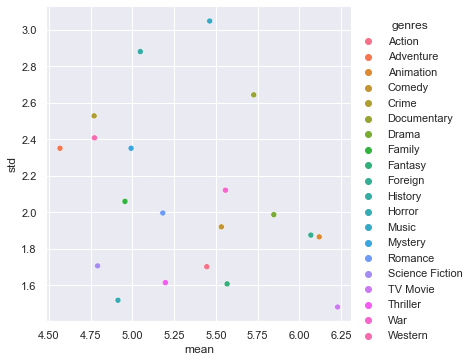

In [46]:
sns.set_theme(style="darkgrid")
sns.relplot(x="mean", y="std", hue=one_genre.index, data=one_genre['vote_average']);

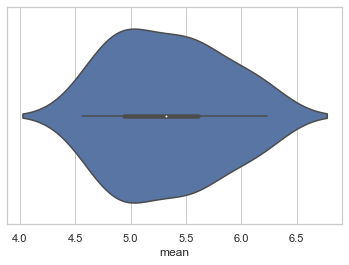

In [47]:
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=one_genre['vote_average']['mean'])

In [48]:
movie_with_one[movie_genres_key == 'TV Movie']

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count,num_genres
title,,,,,,,,,,,,,,,,,,,,,
David Copperfield,FALSE,NaN,0.0,[TV Movie],NaN,141640,tt0238768,it,David Copperfield,An orphan with a rough childhood becomes a bar...,...,2001-12-25,0.0,0.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,False,4.8,5.0,1
The Pretender 2001,FALSE,NaN,0.0,[TV Movie],NaN,27338,tt0271732,en,The Pretender 2001,Jarod reunites with two old friends and unleas...,...,2001-01-22,0.0,96.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,He is a master of disguise. She is a master of...,False,5.4,5.0,1
Gangsta Granny,FALSE,NaN,0.0,[TV Movie],NaN,245739,tt3286484,en,Gangsta Granny,A young boy is bored spending time with his du...,...,2013-12-26,0.0,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,4.8,8.0,1
Naughty or Nice,FALSE,NaN,0.0,[TV Movie],NaN,145711,tt2417134,en,Naughty or Nice,Krissy Kringle receives a delivery intended fo...,...,2012-12-24,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.1,19.0,1
October Kiss,FALSE,NaN,0.0,[TV Movie],NaN,362884,tt5076032,en,October Kiss,Poppy Summerall is hired near Halloween as a t...,...,2015-10-17,0.0,84.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,False,6.5,6.0,1
Den radio,FALSE,NaN,0.0,[TV Movie],NaN,143883,tt5952180,ru,День Радио (Спектакль),NaN,...,2001-03-24,0.0,0.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,False,9.0,5.0,1
The Idiot,FALSE,NaN,0.0,[TV Movie],NaN,444623,tt0366028,ru,Idiot,TV miniseries of the Dostoevsky novel.,...,2003-04-01,0.0,550.0,[],Released,NaN,False,7.0,1.0,1


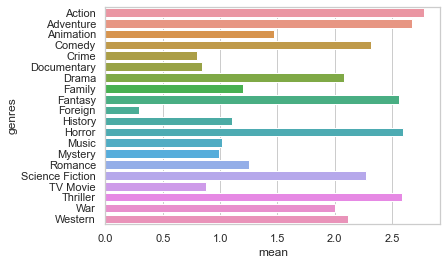

In [51]:
pap = sns.barplot(data=one_genre['popularity'], y=one_genre.index, x= 'mean', orient="h")

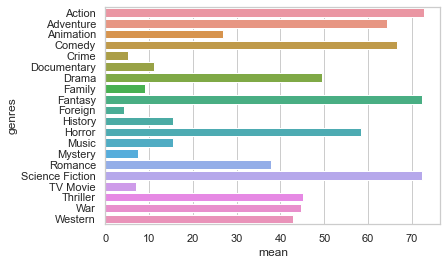

In [52]:
vcap = sns.barplot(data=one_genre['vote_count'], y=one_genre.index, x= 'mean', orient="h")

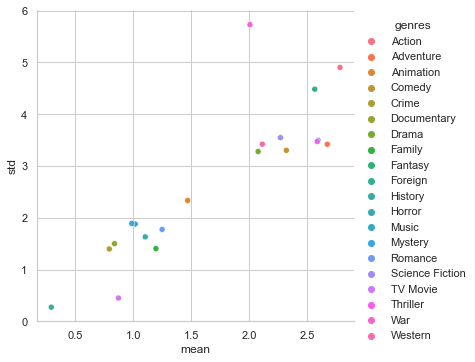

In [143]:
r = sns.relplot(data=one_genre['popularity'], x="mean", y="std", hue=one_genre.index)

In [59]:
mgk=movies['genres'].apply(lambda x: '_'.join((map(str,x))))

In [61]:
all_movies = movies.groupby(mgk).agg([np.mean, np.std]) 
all_movies

budget               popularity  \
                                           mean           std       mean   
genres                                                                     
                                   4.719209e+04  5.923161e+05   0.304807   
Action                             4.572418e+06  1.744645e+07   2.781620   
Action_Adventure                   1.074973e+07  3.400718e+07   3.673668   
Action_Adventure_Animation         3.500000e+05  1.106797e+06   3.758203   
Action_Adventure_Animation_Comedy  0.000000e+00  0.000000e+00   2.920726   
...                                         ...           ...        ...   
Western_Science Fiction            2.000000e+06           NaN   1.225217   
Western_TV Movie                   2.500000e+06  3.535534e+06   0.726138   
Western_Thriller                   2.333333e+06  4.041452e+06   2.560855   
Western_War                        0.000000e+00           NaN   0.515080   
Western_War_History_Romance        0.000000e+00           NaN   1.159273   

                                                  revenue                \
                                        std          mean           std   
genres                                                                    
                                   0.490416  7.639705e+04  2.505130e+06   
Action                             4.904922  1.080632e+07  9.359374e+07   
Action_Adventure                   6.680113  1.844821e+07  6.415925e+07   
Action_Adventure_Animation         2.459331  0.000000e+00  0.000000e+00   
Action_Adventure_Animation_Comedy  0.836934  0.000000e+00  0.000000e+00   
...                                     ...           ...           ...   
Western_Science Fiction                 NaN  0.000000e+00           NaN   
Western_TV Movie                   0.769727  0.000000e+00  0.000000e+00   
Western_Thriller                   2.842772  2.049000e+03  3.548972e+03   
Western_War                             NaN  0.000000e+00           NaN   
Western_War_History_Romance             NaN  0.000000e+00           NaN   

                                      runtime            vote_average  \
                                         mean        std         mean   
genres                                                                  
                                    69.984349  57.955564     4.239435   
Action                              98.446043  34.475476     5.444964   
Action_Adventure                   101.419355  41.122384     5.164516   
Action_Adventure_Animation          79.100000  26.134056     6.120000   
Action_Adventure_Animation_Comedy  115.000000   7.071068     6.900000   
...                                       ...        ...          ...   
Western_Science Fiction             87.000000        NaN     5.300000   
Western_TV Movie                   104.000000  22.627417     1.400000   
Western_Thriller                    96.000000   8.544004     4.866667   
Western_War                        105.000000        NaN     6.400000   
Western_War_History_Romance        113.000000        NaN     7.000000   

                                             vote_count              \
                                        std        mean         std   
genres                                                                
                                   3.069244    2.944308    9.940223   
Action                             1.700656   72.863309  348.051030   
Action_Adventure                   1.625052  114.881720  373.998019   
Action_Adventure_Animation         2.241428   73.000000   79.664575   
Action_Adventure_Animation_Comedy  0.000000   17.500000    3.535534   
...                                     ...         ...         ...   
Western_Science Fiction                 NaN    9.000000         NaN   
Western_TV Movie                   1.979899    2.000000    1.414214   
Western_Thriller                   1.628906   29.000000   36.592349   
Western_War                             NaN    5.0

AttributeError: 'float' object has no attribute 'head'

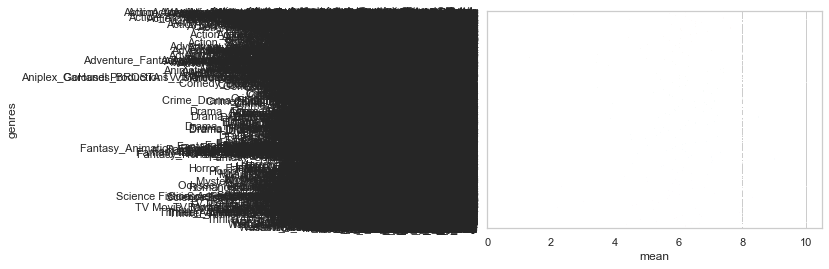

In [62]:
mvap = sns.barplot(data=all_movies['vote_average'], y=all_movies.index, x= 'mean', orient="h")

In [63]:
movies.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
budget,45433.0,4.224549e+06,1.742799e+07,0.0,0.000000,0.000000,0.000000,3.800000e+08
popularity,45430.0,2.921206e+00,6.006708e+00,0.0,0.385872,1.127238,3.678128,5.474883e+02
revenue,45430.0,1.121288e+07,6.435213e+07,0.0,0.000000,0.000000,0.000000,2.787965e+09
runtime,45173.0,9.412430e+01,3.841554e+01,0.0,85.000000,95.000000,107.000000,1.256000e+03
vote_average,45430.0,5.618329e+00,1.924139e+00,0.0,5.000000,6.000000,6.800000,1.000000e+01
vote_count,45430.0,1.099360e+02,4.914663e+02,0.0,3.000000,10.000000,34.000000,1.407500e+04
num_genres,45436.0,2.003411e+00,1.130823e+00,0.0,1.000000,2.000000,3.000000,8.000000e+00


In [64]:
movies[mgk.str.contains('Drama')].describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,num_genres
count,2.024400e+04,20243.000000,2.024300e+04,20189.000000,20243.000000,20243.000000,20244.000000
mean,3.460315e+06,3.010777,7.943673e+06,103.050374,5.905888,96.570074,2.325924
std,1.297347e+07,4.422499,4.322779e+07,35.008632,1.696579,417.306082,1.074500
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,0.000000e+00,0.503283,0.000000e+00,90.000000,5.400000,4.000000,2.000000
50%,0.000000e+00,1.322188,0.000000e+00,100.000000,6.200000,11.000000,2.000000
75%,0.000000e+00,4.131608,0.000000e+00,114.000000,6.900000,37.000000,3.000000
max,2.500000e+08,154.801009,1.845034e+09,1256.000000,10.000000,12269.000000,8.000000


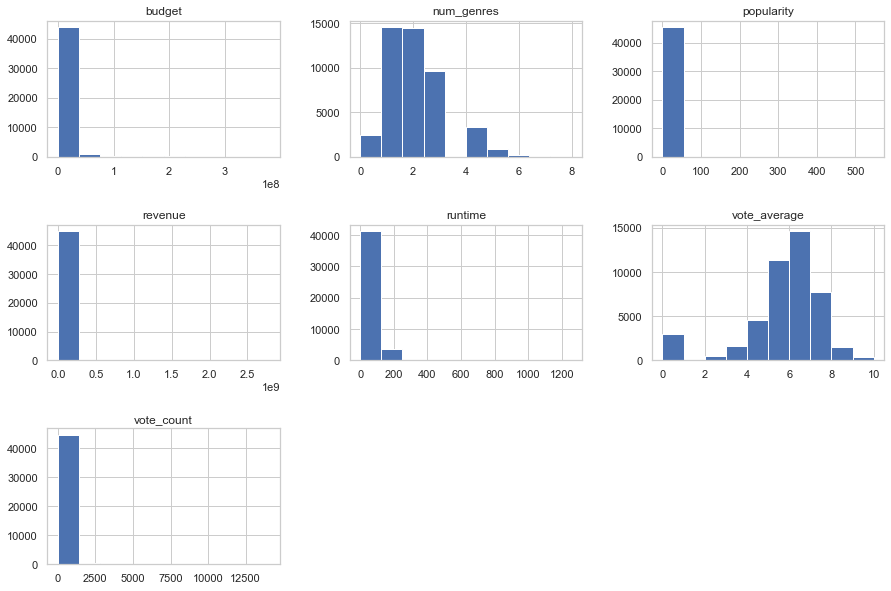

In [72]:
movies.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

C:\Users\sathw\anaconda3\lib\site-packages\seaborn\axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000019DBF9B7400> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


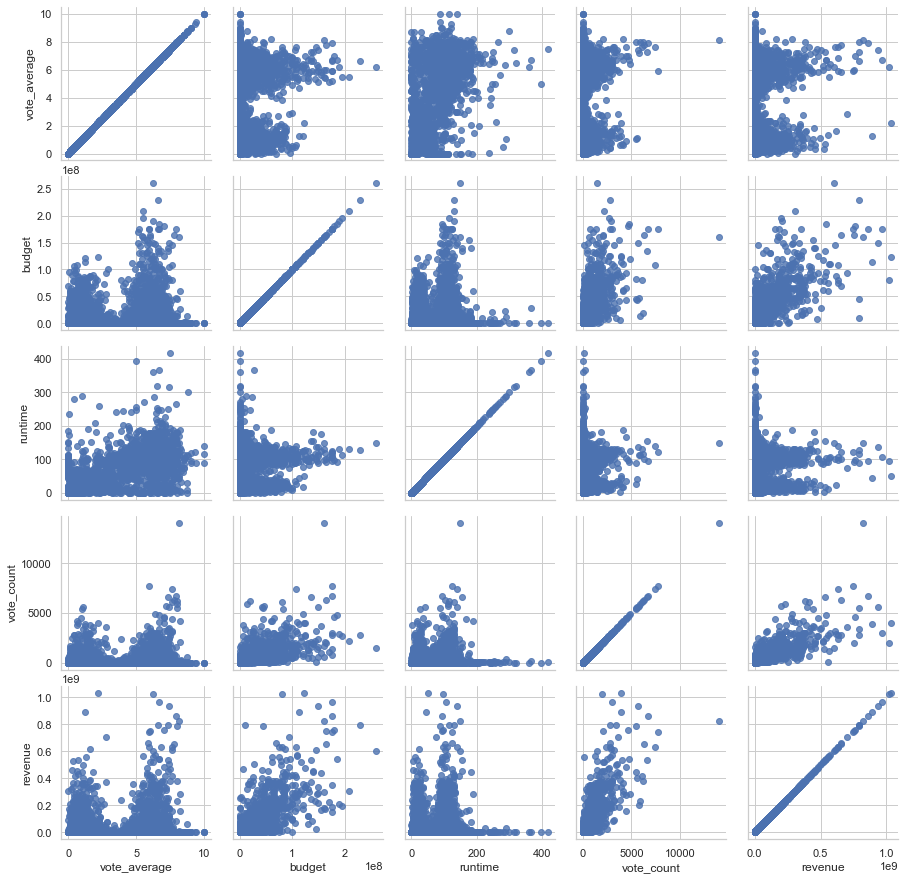

In [94]:
g = sns.PairGrid(all_movies, vars=['vote_average', 'budget', 'runtime', 'vote_count', 'revenue'], palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

In [120]:
all_movies.columns

MultiIndex([(      'budget', 'mean'),
            (      'budget',  'std'),
            (  'popularity', 'mean'),
            (  'popularity',  'std'),
            (     'revenue', 'mean'),
            (     'revenue',  'std'),
            (     'runtime', 'mean'),
            (     'runtime',  'std'),
            ('vote_average', 'mean'),
            ('vote_average',  'std'),
            (  'vote_count', 'mean'),
            (  'vote_count',  'std'),
            (  'num_genres', 'mean'),
            (  'num_genres',  'std')],
           )

In [ ]:
ratings = pd.read_csv('C:/Users/sathw/Desktop/Springboard_work/IMDB-Movie-Ratings/rawdata/ratings.csv', nrows = 200000, low_memory = False)
ratings.head()

In [ ]:
ratings = ratings.rename(columns = {'movieId': 'id'})

In [ ]:
ratings.id = ratings.id.astype(float)

In [ ]:
ratings.info()

In [75]:
#movie_small = movie_small.rename(columns = {'original_title': 'title'})

In [74]:
#movie_small.head()

,original_title,variable,Genre
0,Toy Story,genres,"[Animation, Comedy, Family]"
1,Jumanji,genres,"[Adventure, Fantasy, Family]"
2,Grumpier Old Men,genres,"[Romance, Comedy]"
3,Waiting to Exhale,genres,"[Comedy, Drama, Romance]"
4,Father of the Bride Part II,genres,[Comedy]


In [ ]:
#movie_small.dtypes

In [ ]:
#movie_small['id'] = pd.to_numeric(movie_small['id'], errors = 'coerce')

In [ ]:
#movie_small.dtypes

In [ ]:
#movie_small.isnull().sum()

In [ ]:
#movie_small[movie_small['id'].isna()]

In [ ]:
#movie_small_non = movie_small[movie_small['vote_average'].notna()]

In [ ]:
#movie_small_non.head()

In [ ]:
#movie_small_non.count()

In [ ]:
#combined_df = pd.merge(diff_look_clean,ratings, on = 'id')

In [ ]:
#combined_df.info()

movie['post_proc'] = movie[genres'].apply(clean, axis=1)

In [ ]:
#combined_df.head(10)

In [73]:
#movie_small = pd.melt(movies, id_vars = 'original_title', value_vars = ['genres'], value_name = 'Genre')

#movie_small = pd.melt(movies, 
#                        id_vars = ['original_title', 'vote_average', 'vote_count', 'id', 'genres', 
#                                   'popularity','release_date', 'budget', 'revenue', 'runtime'])

In [ ]:
#combined_df.groupby(by ='title')[['vote_average', 'vote_count']].max().sort_values(by = 'vote_count', ascending = False)

In [ ]:
#basically a vote count <- checks for duplicates
#combined_df['title'].value_counts()

In [ ]:
#combined_df[combined_df['title'].str.contains('Jaws')]

In [ ]:
#vap, vas = movie_with_one.groupby(movie_genres_key)['vote_average'].mean(), movie_with_one.groupby(movie_genres_key)['vote_average'].std()
#vap = vap.sort_values(ascending = False)
#vap.head(10).plot(kind='barh')
#plt.xlabel('vote average')
#print(type(vap))
#one_genre = pd.merge(vap, vas, right_index = True, left_index = True) 
#one_genre = one_genre.rename(columns = {'vote_average_x':'vote_average','vote_average_y': 'standard_deviation'})
#one_genre.dtypes
#one_genre
#pap = pap.sort_values(ascending = False)
#pap.head(10).plot(kind= 'barh')
#plt.xlabel('popularity'
#movie_with_one.groupby(movie_genres_key)['vote_count'].mean()
#vcap = vcap.sort_values(ascending = False)
#vcap.head(10).plot(kind= 'barh')
#plt.xlabel('vote count')
#movies.groupby(mgk)['vote_average'].mean()
#mvap= mvap.sort_values(ascending = False)
#mvap.head(10).plot(kind= 'barh')
#plt.xlabel('vote average')
#mvap.head(10)